In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
cancer = load_breast_cancer()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                   random_state=0)

In [6]:
lr = LogisticRegression(max_iter=5000)

In [7]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [8]:
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)

In [9]:
print(train_score)
print(test_score)

0.9624413145539906
0.9370629370629371


In [10]:
lr100 = LogisticRegression(C=100, max_iter=500)

In [11]:
lr100.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, max_iter=500)

In [14]:
train_score100 = lr100.score(x_train, y_train)
test_score100 = lr100.score(x_test, y_test)

In [15]:
print(train_score100)
print(test_score100)

0.9788732394366197
0.9300699300699301


In [17]:
lr001 = LogisticRegression(C=0.01, max_iter=5000)
lr001.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=5000)

In [18]:
train_score001 = lr001.score(x_train, y_train)
test_score001 = lr001.score(x_test, y_test)

In [19]:
print(train_score001)
print(test_score001)

0.9553990610328639
0.951048951048951


In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

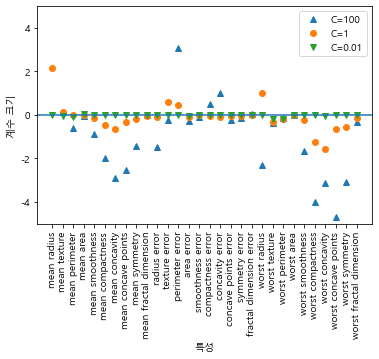

In [26]:
plt.plot(lr100.coef_.T, '^', label='C=100') #^,o,v:모양
plt.plot(lr.coef_.T, 'o', label='C=1')
plt.plot(lr001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()
plt.show()

C=0.010인 l1 로지스틱 회귀의 훈련 정확도 : 0.92
C=0.010인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.97
C=1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.93
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.94


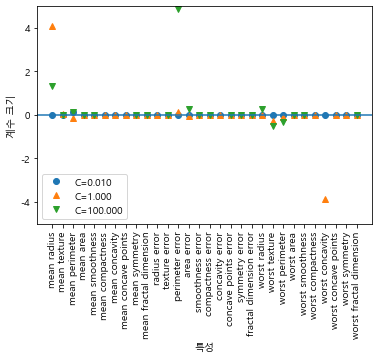

In [29]:
for C, marker in zip([0.01, 1, 100], ['o', '^', 'v']) :
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty='l1', max_iter=1000).fit(x_train, y_train)
    print('C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}'.format(C, lr_l1.score(x_train, y_train)))
    print('C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}'.format(C, lr_l1.score(x_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()